<a href="https://colab.research.google.com/github/AfsanehShamsaddini/Predicting-Tips-Using-Linear-Regression/blob/main/Predicting_Tips_Using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔍 **Dataset Description:**
- The dataset contains 244 entries, each representing a meal at a restaurant.
- It includes information about the total bill, tip amount, and various factors that might influence tipping behavior.

Key features in the dataset include:
- `total_bill`: The total amount of the bill (in US dollars)
- `tip`: The amount of the tip (in US dollars)
- `sex`: The gender of the person paying the bill
- `smoker`: Whether the party included smokers (Yes/No)
- `day`: The day of the week
- `time`: Whether it was a dinner or lunch
- `size`: The number of people in the party

## <a id='toc1_'></a>[Data Exploration and Preprocessing](#toc0_)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [86]:
# Load the tips dataset
tips_data = sns.load_dataset('tips')
data = sns.load_dataset('tips')

In [ ]:
# Display the first few rows and columns
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# Getting some information about dataset
tips_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
# Getting sume statistical imformation
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### <a id='toc1_1_'></a>[Handling Missing Values](#toc0_)


In [ ]:
# Checking missing values
tips_data.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [ ]:
# Getting the number od rows and columns
tips_data.shape

(244, 7)

In [ ]:
# Checking duplicate data
tips_data.duplicated().sum()

np.int64(1)

In [ ]:
tips_data.drop_duplicates(inplace=True)

In [ ]:
# Getting the number od rows and columns after dropping duplicate data
tips_data.shape

(243, 7)

### <a id='toc1_2_'></a>[Exploratory Data Analysis (EDA)](#toc0_)


Text(0, 0.5, 'Frequency')

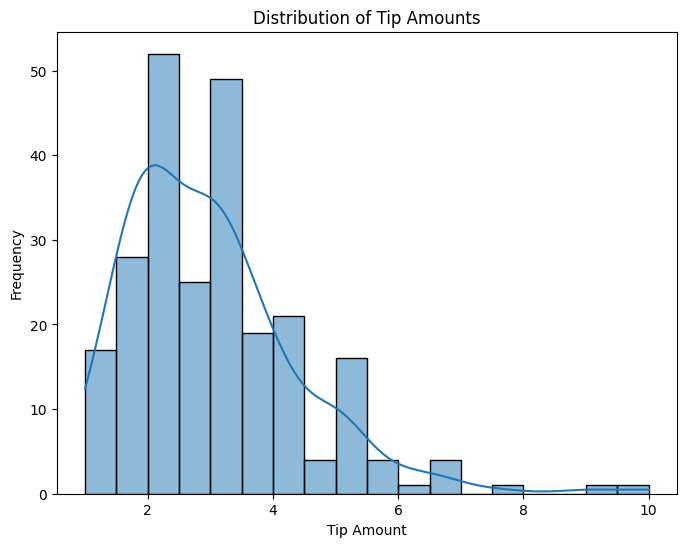

In [ ]:
# Distribution of tip amounts
plt.figure(figsize=(8, 6))
sns.histplot(tips_data['tip'], kde=True)
plt.title('Distribution of Tip Amounts')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')

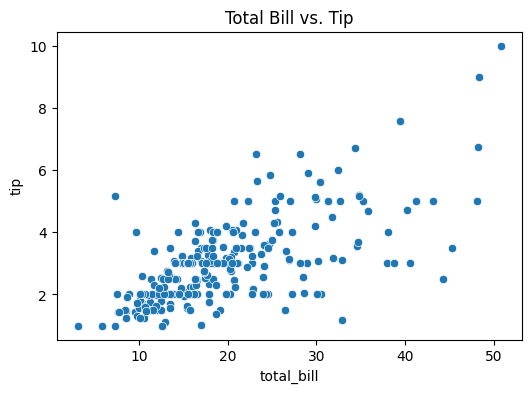

In [ ]:
# Relationship between total bill and tip
plt.figure(figsize=(6, 4))
sns.scatterplot(x = 'total_bill', y='tip', data = tips_data)
plt.title('Total Bill vs. Tip')
plt.show()

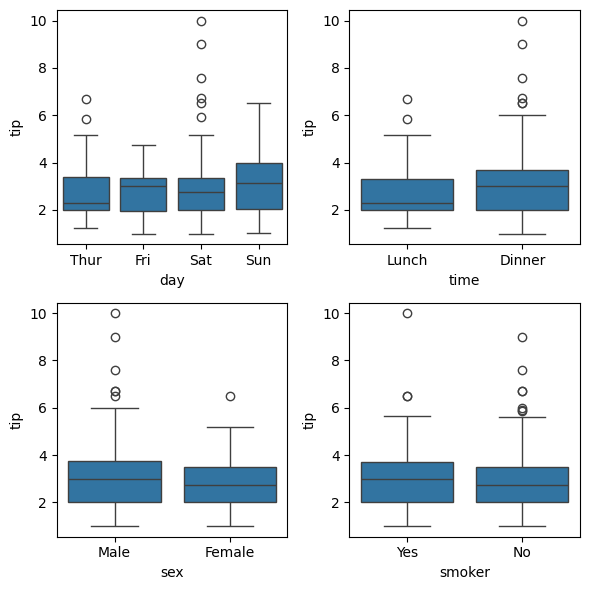

In [ ]:
# Box plots for categorical variables
fig, axs = plt.subplots(2, 2, figsize=(6, 6))
sns.boxplot(x='day', y='tip', data = tips_data, ax = axs[0,0])
sns.boxplot(x='time', y='tip', data = tips_data, ax = axs[0,1])
sns.boxplot(x='sex', y='tip', data = tips_data, ax = axs[1,0])
sns.boxplot(x='smoker', y='tip', data = tips_data, ax = axs[1,1])
plt.tight_layout()
plt.show()

### <a id='toc1_3_'></a>[Feature Encoding](#toc0_)

In [ ]:
# Categorical encoding for 'sex', 'smoker', and 'time'
tips_data['sex'] = tips_data['sex'].cat.codes
tips_data['smoker'] = tips_data['smoker'].cat.codes
tips_data['time'] = tips_data['time'].cat.codes

# One-hot encoding for 'day'
tips_data = pd.get_dummies(tips_data, columns=['day'], prefix='day')

tips_data.head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,1,1,1,2,False,False,False,True
1,10.34,1.66,0,1,1,3,False,False,False,True
2,21.01,3.50,0,1,1,3,False,False,False,True
3,23.68,3.31,0,1,1,2,False,False,False,True
4,24.59,3.61,1,1,1,4,False,False,False,True


### <a id='toc1_5_'></a>[Preparing for Modeling](#toc0_)


In [ ]:
X = tips_data.drop('tip', axis=1)
y = tips_data['tip']

print(X.columns)

Index(['total_bill', 'sex', 'smoker', 'time', 'size', 'day_Thur', 'day_Fri',
       'day_Sat', 'day_Sun'],
      dtype='object')


## <a id='toc2_'></a>[Feature Selection and Engineering](#toc0_)

### <a id='toc2_1_'></a>[Correlation Analysis](#toc0_)


In [ ]:
# Calculate correlations
corr_matrix = tips_data.corr()
corr_matrix

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
total_bill,1.000000,0.674998,-0.141350,-0.090136,0.179232,0.597589,-0.133758,-0.087201,0.052703,0.121096
tip,0.674998,1.000000,-0.085274,-0.009763,0.117596,0.488400,-0.091433,-0.056398,-0.005016,0.123360
sex,-0.141350,-0.085274,1.000000,0.009930,-0.198129,-0.083248,0.186796,0.072950,-0.050085,-0.165155
smoker,-0.090136,-0.009763,0.009930,1.000000,-0.063911,0.130564,0.138821,-0.246709,-0.160366,0.178861
time,0.179232,0.117596,-0.198129,-0.063911,1.000000,0.100045,-0.917076,-0.060416,0.460764,0.416226
size,0.597589,0.488400,-0.083248,0.130564,0.100045,1.000000,-0.068834,-0.143033,-0.043040,0.191713
day_Thur,-0.133758,-0.091433,0.186796,0.138821,-0.917076,-0.068834,1.000000,-0.168609,-0.432341,-0.390551
day_Fri,-0.087201,-0.056398,0.072950,-0.246709,-0.060416,-0.143033,-0.168609,1.000000,-0.217495,-0.196472
day_Sat,0.052703,-0.005016,-0.050085,-0.160366,0.460764,-0.043040,-0.432341,-0.217495,1.000000,-0.503786
day_Sun,0.121096,0.123360,-0.165155,0.178861,0.416226,0.191713,-0.390551,-0.196472,-0.503786,1.000000


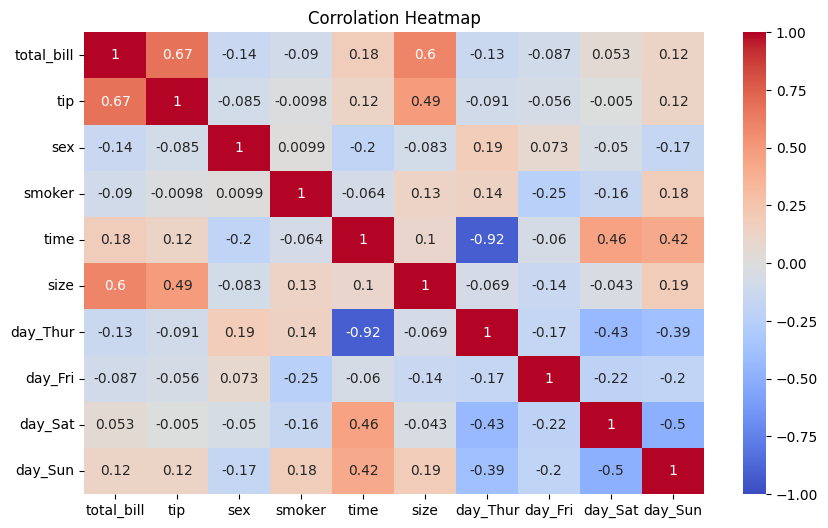

In [ ]:
# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap= 'coolwarm', vmin=-1, vmax = 1, center = 0)
plt.title('Corrolation Heatmap')
plt.show()

In [ ]:
# Print correlations with 'tip'
corr_matrix['tip'].sort_values(ascending=False)

,tip
tip,1.000000
total_bill,0.674998
size,0.488400
day_Sun,0.123360
time,0.117596
day_Sat,-0.005016
smoker,-0.009763
day_Fri,-0.056398
sex,-0.085274
day_Thur,-0.091433


### <a id='toc2_2_'></a>[Visualizing Relationships](#toc0_)


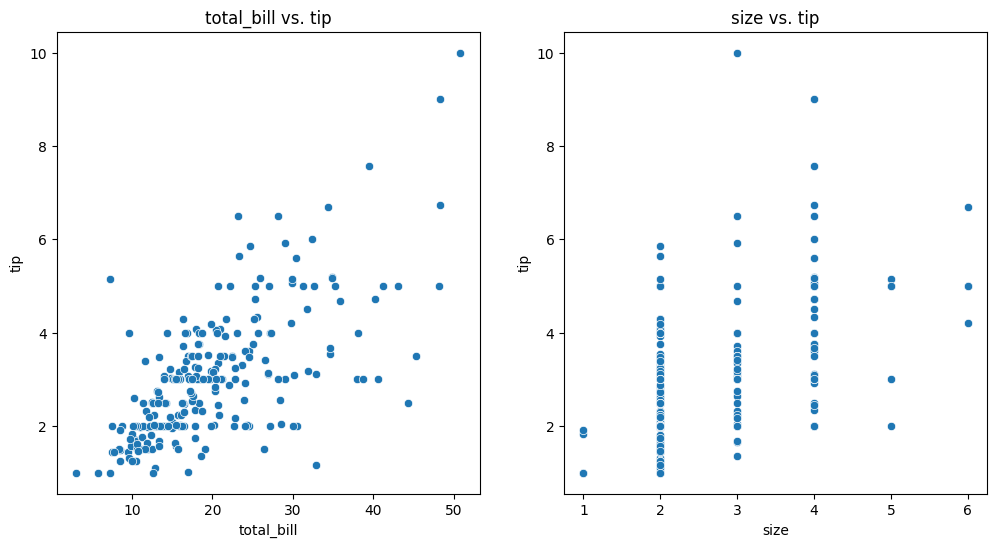

In [ ]:
numerical_features = ['total_bill', 'size']
fig, axs = plt.subplots(1, 2, figsize=(12,6))

for i,feature in enumerate(numerical_features):
  sns.scatterplot(x= feature, y = 'tip', data= tips_data, ax=axs[i])
  axs[i].set_title(f'{feature} vs. tip')

### <a id='toc2_3_'></a>[Selecting Initial Features](#toc0_)


In [ ]:
# Select a subset of features
selected_features = ['total_bill', 'size', 'time', 'day_Sat', 'day_Sun']
X_selected = tips_data[selected_features]

print("Selected features:", X_selected.columns)

Selected features: Index(['total_bill', 'size', 'time', 'day_Sat', 'day_Sun'], dtype='object')


### <a id='toc2_4_'></a>[Feature Engineering](#toc0_)


Now, let's create some new features that might improve our model:

1. **Tip Percentage:**

In [ ]:
tips_data['tip_percentage'] = tips_data['tip'] / tips_data['total_bill'] * 100

tips_data.head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun,tip_percentage
0,16.99,1.01,1,1,1,2,False,False,False,True,5.944673
1,10.34,1.66,0,1,1,3,False,False,False,True,16.054159
2,21.01,3.50,0,1,1,3,False,False,False,True,16.658734
3,23.68,3.31,0,1,1,2,False,False,False,True,13.978041
4,24.59,3.61,1,1,1,4,False,False,False,True,14.680765


2. **Per Person Total:**

In [ ]:
tips_data['per_person_total'] = tips_data['total_bill'] / tips_data['size']

tips_data.head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun,tip_percentage,per_person_total
0,16.99,1.01,1,1,1,2,False,False,False,True,5.944673,8.495000
1,10.34,1.66,0,1,1,3,False,False,False,True,16.054159,3.446667
2,21.01,3.50,0,1,1,3,False,False,False,True,16.658734,7.003333
3,23.68,3.31,0,1,1,2,False,False,False,True,13.978041,11.840000
4,24.59,3.61,1,1,1,4,False,False,False,True,14.680765,6.147500


3. **Is Weekend:**

In [ ]:
tips_data['is_weekend'] = tips_data['day_Sat'] | tips_data['day_Sun']

tips_data.head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun,tip_percentage,per_person_total,is_weekend
0,16.99,1.01,1,1,1,2,False,False,False,True,5.944673,8.495000,True
1,10.34,1.66,0,1,1,3,False,False,False,True,16.054159,3.446667,True
2,21.01,3.50,0,1,1,3,False,False,False,True,16.658734,7.003333,True
3,23.68,3.31,0,1,1,2,False,False,False,True,13.978041,11.840000,True
4,24.59,3.61,1,1,1,4,False,False,False,True,14.680765,6.147500,True


4. **Party Size Category:**

In [ ]:
tips_data['party_size_category'] = pd.cut(tips_data['size'], bins=[0, 3, 6, np.inf], labels=['Small', 'Medium', 'Large'])
tips_data = pd.get_dummies(tips_data, columns= ['party_size_category'], prefix='party' )

tips_data.head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun,tip_percentage,per_person_total,is_weekend,party_Small,party_Medium,party_Large
0,16.99,1.01,1,1,1,2,False,False,False,True,5.944673,8.495000,True,True,False,False
1,10.34,1.66,0,1,1,3,False,False,False,True,16.054159,3.446667,True,True,False,False
2,21.01,3.50,0,1,1,3,False,False,False,True,16.658734,7.003333,True,True,False,False
3,23.68,3.31,0,1,1,2,False,False,False,True,13.978041,11.840000,True,True,False,False
4,24.59,3.61,1,1,1,4,False,False,False,True,14.680765,6.147500,True,False,True,False


Let's examine our new features:

In [ ]:
tips_data.filter(like='party_').columns

Index(['party_Small', 'party_Medium', 'party_Large'], dtype='object')

In [ ]:
party_size_columns = tips_data.filter(like='party_').columns.tolist()
tips_data[['tip', 'tip_percentage', 'per_person_total', 'is_weekend'] + party_size_columns].head()

,tip,tip_percentage,per_person_total,is_weekend,party_Small,party_Medium,party_Large
0,1.01,5.944673,8.495000,True,True,False,False
1,1.66,16.054159,3.446667,True,True,False,False
2,3.50,16.658734,7.003333,True,True,False,False
3,3.31,13.978041,11.840000,True,True,False,False
4,3.61,14.680765,6.147500,True,False,True,False


## Updating Selected Features

In [ ]:
# SUpdating Selected Features
selected_features = ['total_bill', 'size', 'time', 'day_Sat', 'day_Sun', 'tip_percentage', 'per_person_total', 'is_weekend'] + [col for col in tips_data.columns if col.startswith('party_')]
X_selected = tips_data[selected_features]

print("Selected features:", X_selected.columns)

Selected features: Index(['total_bill', 'size', 'time', 'day_Sat', 'day_Sun', 'tip_percentage',
       'per_person_total', 'is_weekend', 'party_Small', 'party_Medium',
       'party_Large'],
      dtype='object')


## Preparing Final Dataset for Modeling

In [ ]:
X = X_selected.astype(np.float32)
y = tips_data['tip'].astype(np.float64)

# Split the data into Training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

print('Traning Set Shape', X_train.shape)
print('Testing Set Shape', X_test.shape)

Traning Set Shape (194, 11)
Testing Set Shape (49, 11)


In [ ]:
# checking the size of Training and testing sets
assert X_train.shape[0] + X_test.shape[0] == tips_data.shape[0], "Training and testing sets do not match the original dataset size"
assert X_train.shape[1] == X_test.shape[1], "Training and testing sets do not have the same number of features"

In [ ]:
def add_bias_column(X):
  return np.c_[np.ones((X.shape[0], 1)), X]

# Add a column of ones to X for the intercept term
X_train = add_bias_column(X_train)
X_test = add_bias_column(X_test)

y_train= y_train.values.reshape(-1, 1)
y_test= y_test.values.reshape(-1, 1)

# Multiple Linear Regression

## Implementing Multiple Linear Regression

In [ ]:
# Initialize the model
lr_model = LinearRegression()

# Fit the model
lr_model.fit(X_train, y_train)

LinearRegression()

## Examining the Model

In [ ]:
# Print the intercept and coefficients
print('Intercept: ', lr_model.intercept_)
print('\ncoefficients: ')
for feature, coefficient in zip(X.columns, lr_model.coef_):
  print(f'{feature}: {coefficient}')

Intercept:  [-2.2774966]

coefficients: 
total_bill: [ 0.          0.09569527  0.255139   -0.05867104  0.07074067 -0.07370388
  0.13955566  0.0762219  -0.00296321 -0.11678738  0.11678738  0.        ]


## Model Evaluation

In [ ]:

def evaluate_model(model, X_train, y_train, X_test, y_test):

  # Training set performance
  y_train_pred = model.predict(X_train)
  mse_train = mean_squared_error(y_train, y_train_pred)
  rmse_train = np.sqrt(mse_train)
  r2_train = r2_score(y_train, y_train_pred)

  # Testing set performance
  y_test_pred = model.predict(X_test)
  mse_test = mean_squared_error(y_test, y_test_pred)
  rmse_test = np.sqrt(mse_test)
  r2_test = r2_score(y_test, y_test_pred)

  print('Training set Results:')
  print(f'Mean Squared Error: {mse_train}')
  print(f'Root Mean Squared Error: {rmse_train}')
  print(f'R-squared: {r2_train}')

  print('\nTesting set Results:')
  print(f'Mean Squared Error: {mse_test}')
  print(f'Root Mean Squared Error: {rmse_test}')
  print(f'R-squared: {r2_test}')
  return mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test

In [ ]:
mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test = evaluate_model(lr_model, X_train, y_train, X_test, y_test)

Training set Results:
Mean Squared Error: 0.3034471896982174
Root Mean Squared Error: 0.550860408541236
R-squared: 0.8287709692694423

Testing set Results:
Mean Squared Error: 0.430786843012347
Root Mean Squared Error: 0.6563435403905085
R-squared: 0.8231925901938403


## Visualizing Predictions

Text(0.5, 1.0, 'Actual vs Predicted Tips (Test Set)')

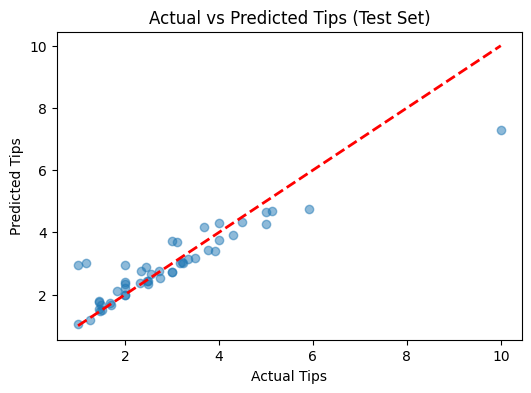

In [ ]:
y_test_pred = lr_model.predict(X_test)

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Tips')
plt.ylabel('Predicted Tips')
plt.title("Actual vs Predicted Tips (Test Set)")

## Residual Analysis

Text(0.5, 1.0, 'Residuals Plot (Test Set)')

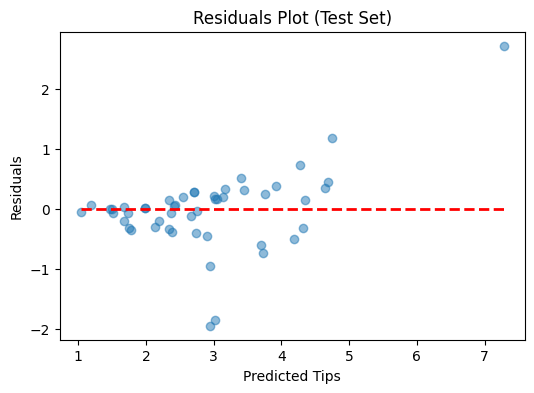

In [ ]:
residuals = y_test - y_test_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin= y_test_pred.min(), xmax= y_test_pred.max(), color='r', linestyles='--', lw=2)
plt.xlabel('Predicted Tips')
plt.ylabel('Residuals')
plt.title("Residuals Plot (Test Set)")

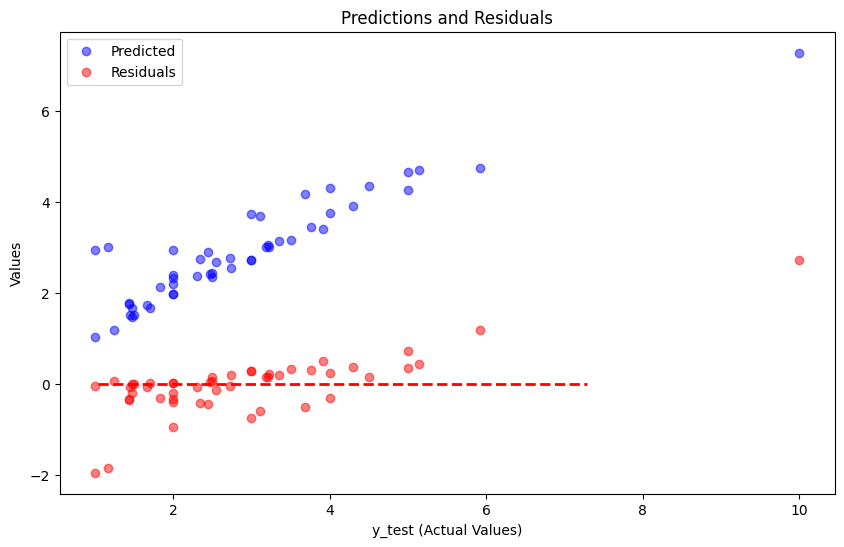

In [ ]:

residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))

# Predicted Tips
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5, label='Predicted')

# Residuals
plt.scatter(y_test, residuals, color='red', alpha=0.5, label='Residuals')

plt.xlabel('y_test (Actual Values)')
plt.ylabel('Values')
plt.hlines(y=0, xmin= y_test_pred.min(), xmax= y_test_pred.max(), color='r', linestyles='--', lw=2)
plt.legend()
plt.title('Predictions and Residuals')
plt.show()

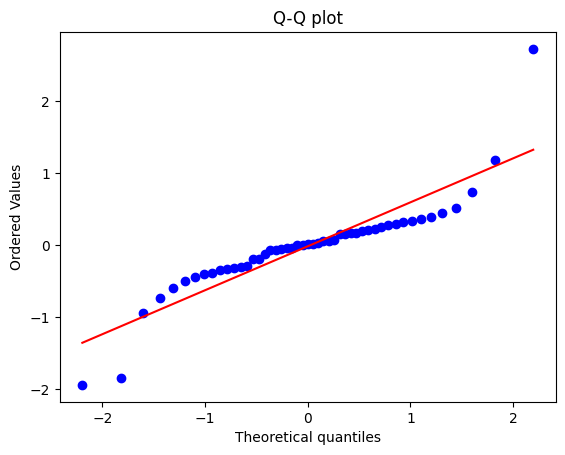

In [ ]:
fig, axs = plt.subplots()
stats.probplot(residuals.reshape(-1), plot=axs, fit= True, dist='norm')
axs.set_title('Q-Q plot')
plt.show()


# Regularization Techniques

## Implementing Ridge Regression

In [ ]:
# Initialize Ridge model
ridge_model = Ridge(alpha=1.0) # alpha is the regularization strenght

# Fit the model
ridge_model.fit(X_train, y_train)

Ridge()

In [ ]:
# Evaluate the model
print('Ridge Regression Results:')
evaluate_model(ridge_model, X_train, y_train, X_test, y_test)

Ridge Regression Results:
Training set Results:
Mean Squared Error: 0.3034728326931615
Root Mean Squared Error: 0.5508836834515627
R-squared: 0.8287564994528864

Testing set Results:
Mean Squared Error: 0.4296860304058814
Root Mean Squared Error: 0.6555044091429755
R-squared: 0.8236443956024506


(0.3034728326931615,
 np.float64(0.5508836834515627),
 0.8287564994528864,
 0.4296860304058814,
 np.float64(0.6555044091429755),
 0.8236443956024506)

In [ ]:
# Print the intercept and coefficients
print('\nRidge coefficients: ')
for feature, coefficient in zip(X.columns, ridge_model.coef_):
  print(f'{feature}: {coefficient}')


Ridge coefficients: 
total_bill: 0.0
size: 0.09788686460067293
time: 0.24011824584221766
day_Sat: -0.05433347967934811
day_Sun: 0.06746465194784752
tip_percentage: -0.07271428496978441
per_person_total: 0.13943979832740463
is_weekend: 0.07074692237991767
party_Small: -0.005249633021931217
party_Medium: -0.11387915285133397
party_Large: 0.11387915285133382


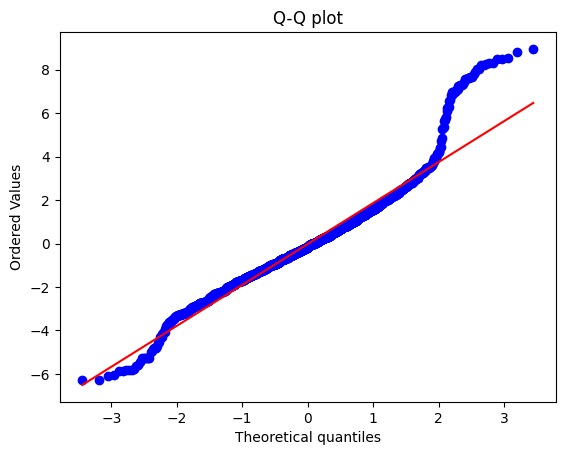

In [ ]:
residuals_ridge = y_test - ridge_model.predict(X_test)
fig, axs = plt.subplots()
stats.probplot(residuals_ridge.reshape(-1), plot=axs, fit= True, dist='norm')
axs.set_title('Q-Q plot')
plt.show()

## Implementing Lasso Regression

In [ ]:
# Initialize Lasso model
lasso_model = Lasso(alpha=1.0) # alpha is the regularization strenght

# Fit the model
lasso_model.fit(X_train, y_train)

Lasso()

In [ ]:
# Evaluate the model
print('Lasso Regression Results:')
evaluate_model(lasso_model, X_train, y_train, X_test, y_test)

Lasso Regression Results:
Training set Results:
Mean Squared Error: 0.37630252670031455
Root Mean Squared Error: 0.6134350223946416
R-squared: 0.7876601955930613

Testing set Results:
Mean Squared Error: 0.5780939225096109
Root Mean Squared Error: 0.7603248795808347
R-squared: 0.7627334940202025


(0.37630252670031455,
 np.float64(0.6134350223946416),
 0.7876601955930613,
 0.5780939225096109,
 np.float64(0.7603248795808347),
 0.7627334940202025)

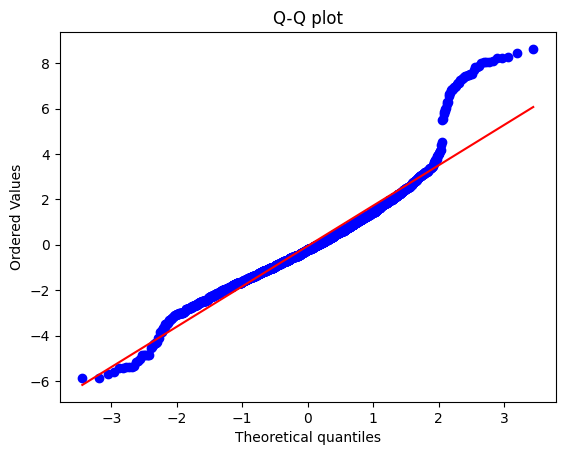

In [ ]:
residuals_lasso = y_test - lasso_model.predict(X_test)
fig, axs = plt.subplots()
stats.probplot(residuals_lasso.reshape(-1), plot=axs, fit= True, dist='norm')
axs.set_title('Q-Q plot')
plt.show()

## Comparing Models
### Visualizing Coefficient Changes


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Bias'),
  Text(1, 0, 'total_bill'),
  Text(2, 0, 'size'),
  Text(3, 0, 'time'),
  Text(4, 0, 'day_Sat'),
  Text(5, 0, 'day_Sun'),
  Text(6, 0, 'tip_percentage'),
  Text(7, 0, 'per_person_total'),
  Text(8, 0, 'is_weekend'),
  Text(9, 0, 'party_Small'),
  Text(10, 0, 'party_Medium'),
  Text(11, 0, 'party_Large')])

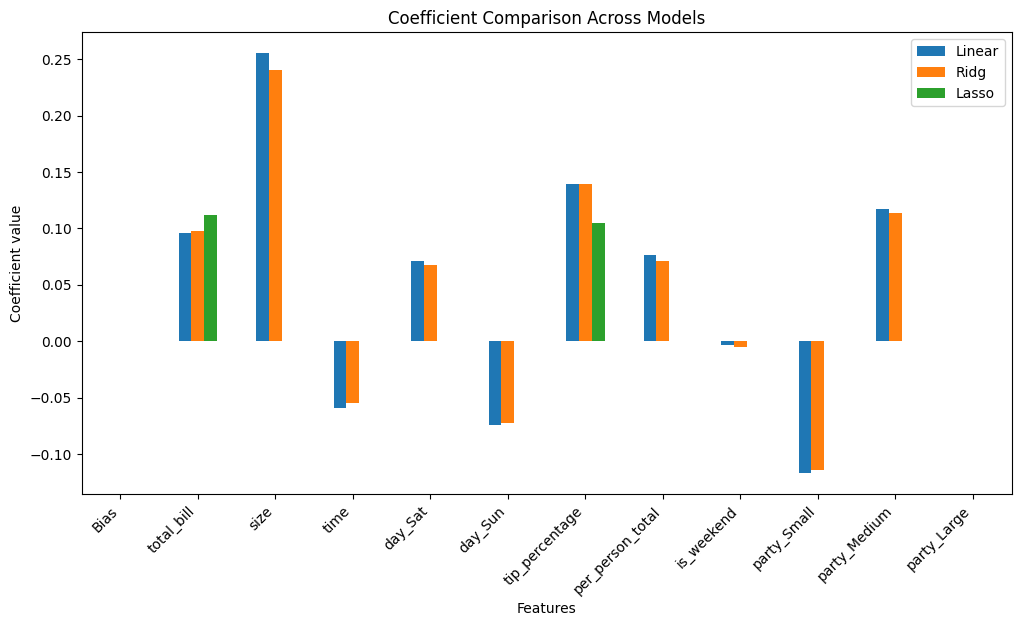

In [ ]:
coef_df = pd.DataFrame({
    'Linear': lr_model.coef_.flatten(),
    'Ridg': ridge_model.coef_.flatten(),
    'Lasso': lasso_model.coef_.flatten(),
}, index= ['Bias'] + list(X.columns))

coef_df.plot(kind= 'bar', figsize=(12, 6))
plt.title('Coefficient Comparison Across Models')
plt.xlabel('Features')
plt.ylabel('Coefficient value')
plt.legend(loc='best')
plt.xticks(rotation=45, ha='right')

### Tuning Regularization Strength


In [ ]:
# Define the parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create GridSearchCV object
grid_search = GridSearchCV(Ridge(), param_grid, cv = 5, scoring='neg_mean_squared_error')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print the besr parameter and score
print('Best Parameter: ', grid_search.best_params_)
print('Best negative MSE: ', -grid_search.best_score_)

# Use the best model for final Evaluation
best_ridge_model = grid_search.best_estimator_
print("\nBest Ridge Model Results:")
evaluate_model(best_ridge_model, X_train, y_train, X_test, y_test)

Best Parameter:  {'alpha': 100}
Best negative MSE:  0.4036940776919642

Best Ridge Model Results:
Training set Results:
Mean Squared Error: 0.31109073574728674
Root Mean Squared Error: 0.5577550858103284
R-squared: 0.8244578728699398

Testing set Results:
Mean Squared Error: 0.4219726957638947
Root Mean Squared Error: 0.6495942547189705
R-squared: 0.8268101717656253


(0.31109073574728674,
 np.float64(0.5577550858103284),
 0.8244578728699398,
 0.4219726957638947,
 np.float64(0.6495942547189705),
 0.8268101717656253)

## Model Evaluation and Comparison
### Comparing All Models

In [ ]:
models = {
   'Multiple Linear Rehression': lr_model,
   'Ridge Regression': ridge_model,
   'Lasso Regression': lasso_model,
}

results = []

for name, model in models.items():
    mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test= evaluate_model(model, X_train, y_train, X_test, y_test )
    results.append({
        "Model": name,
        "Train MSE": mse_train,
        "Train R2": r2_train,
        "Test MSE": mse_test,
        "Test R2": r2_test,
        "Train RMSE": np.sqrt(mse_train),
        "Test RMSE": np.sqrt(mse_test),

    }

    )
results_df = pd.DataFrame(results)
results_df


Training set Results:
Mean Squared Error: 0.3034471896982174
Root Mean Squared Error: 0.550860408541236
R-squared: 0.8287709692694423

Testing set Results:
Mean Squared Error: 0.430786843012347
Root Mean Squared Error: 0.6563435403905085
R-squared: 0.8231925901938403
Training set Results:
Mean Squared Error: 0.3034728326931615
Root Mean Squared Error: 0.5508836834515627
R-squared: 0.8287564994528864

Testing set Results:
Mean Squared Error: 0.4296860304058814
Root Mean Squared Error: 0.6555044091429755
R-squared: 0.8236443956024506
Training set Results:
Mean Squared Error: 0.37630252670031455
Root Mean Squared Error: 0.6134350223946416
R-squared: 0.7876601955930613

Testing set Results:
Mean Squared Error: 0.5780939225096109
Root Mean Squared Error: 0.7603248795808347
R-squared: 0.7627334940202025


,Model,Train MSE,Train R2,Test MSE,Test R2,Train RMSE,Test RMSE
0,Multiple Linear Rehression,0.303447,0.828771,0.430787,0.823193,0.550860,0.656344
1,Ridge Regression,0.303473,0.828756,0.429686,0.823644,0.550884,0.655504
2,Lasso Regression,0.376303,0.787660,0.578094,0.762733,0.613435,0.760325


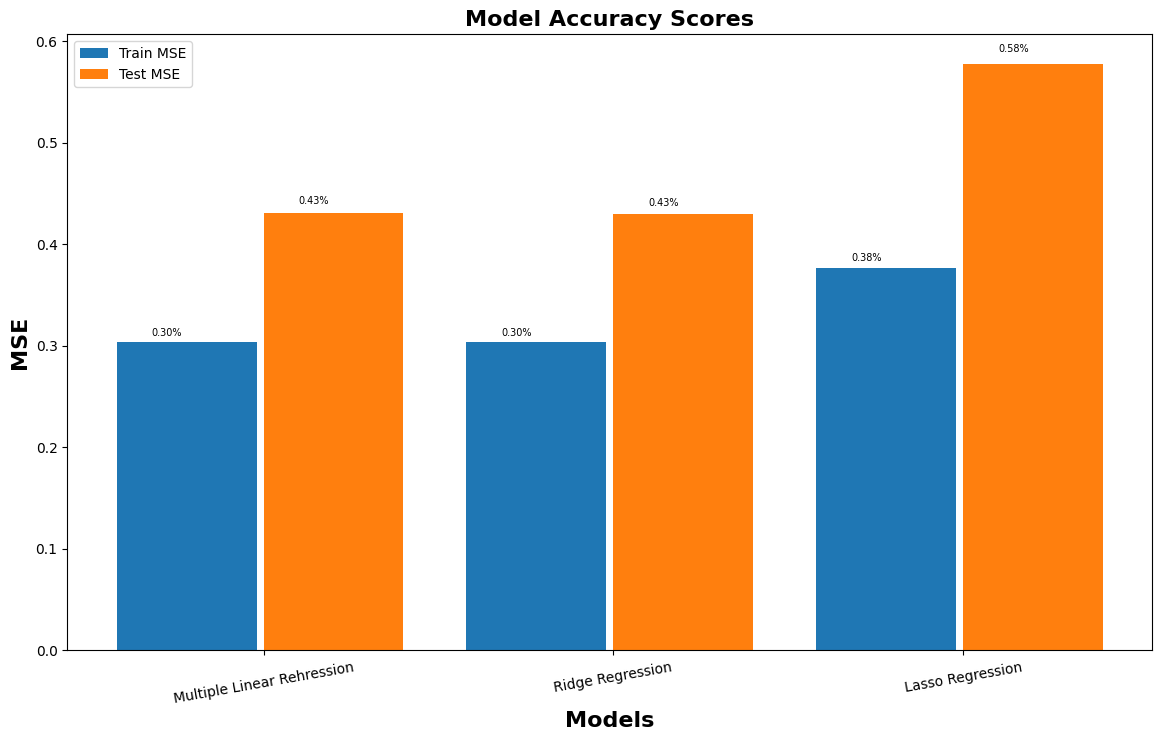

In [82]:
model_names = results_df['Model'].tolist()
models_train_mse = results_df['Train MSE'].tolist()
models_test_mse = results_df['Test MSE'].tolist()

fig, ax = plt.subplots(figsize=(14, 8))

x_pos = np.arange(3)

bar1 = plt.bar(x_pos - 0.22, models_train_mse , width=0.4, label= 'Train MSE')
bar2 = plt.bar(x_pos + 0.2, models_test_mse , width=0.4, label= 'Test MSE')
plt.xticks(x_pos, model_names)

plt.xlabel('Models', fontsize = 16, fontweight = 'bold')
plt.ylabel('MSE', fontsize = 16, fontweight = 'bold')
plt.title('Model Accuracy Scores', fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()


for i, bar in enumerate(bar1):
  plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() * 1.02,
           s = '{:.2f}%'.format(models_train_mse[i]), fontsize = 7)


for i, bar in enumerate(bar2):
  plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() * 1.02,
           s = '{:.2f}%'.format(models_test_mse[i]), fontsize = 7)
plt.show()


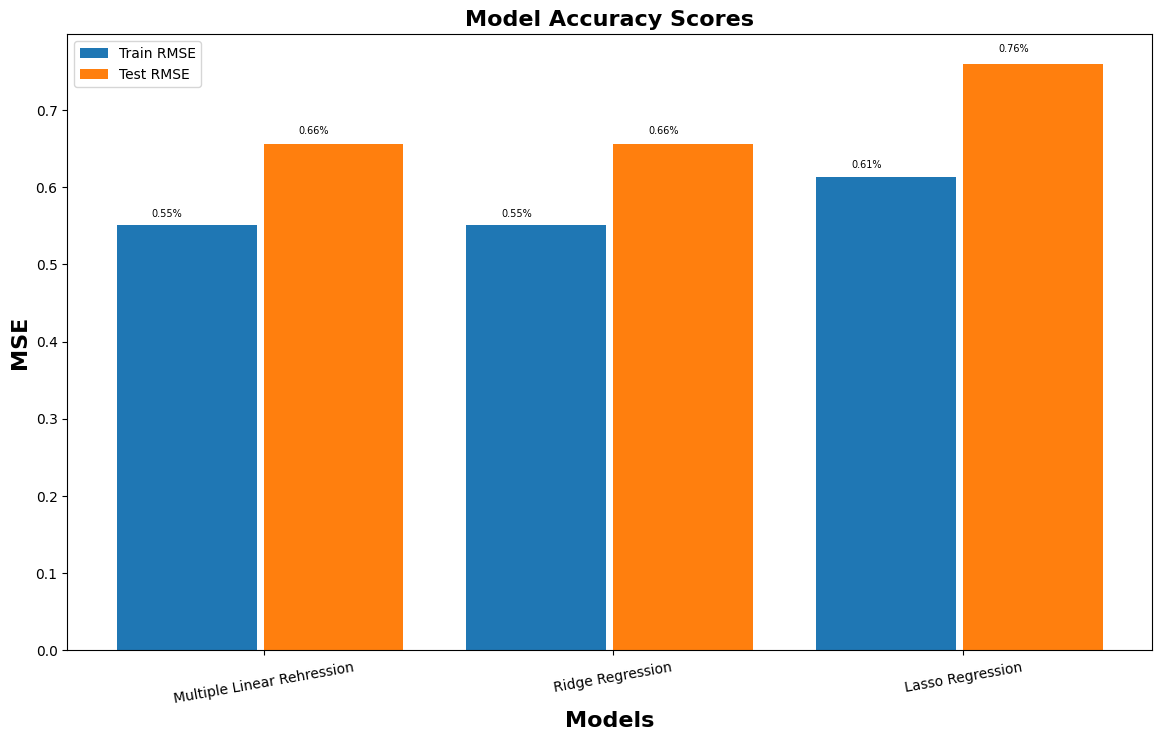

In [83]:
model_names = results_df['Model'].tolist()
models_train_rmse = results_df['Train RMSE'].tolist()
models_test_rmse = results_df['Test RMSE'].tolist()

fig, ax = plt.subplots(figsize=(14, 8))

x_pos = np.arange(3)

bar1 = plt.bar(x_pos - 0.22, models_train_rmse , width=0.4, label= 'Train RMSE')
bar2 = plt.bar(x_pos + 0.2, models_test_rmse , width=0.4, label= 'Test RMSE')
plt.xticks(x_pos, model_names)

plt.xlabel('Models', fontsize = 16, fontweight = 'bold')
plt.ylabel('MSE', fontsize = 16, fontweight = 'bold')
plt.title('Model Accuracy Scores', fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()


for i, bar in enumerate(bar1):
  plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() * 1.02,
           s = '{:.2f}%'.format(models_train_rmse[i]), fontsize = 7)


for i, bar in enumerate(bar2):
  plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() * 1.02,
           s = '{:.2f}%'.format(models_test_rmse[i]), fontsize = 7)
plt.show()


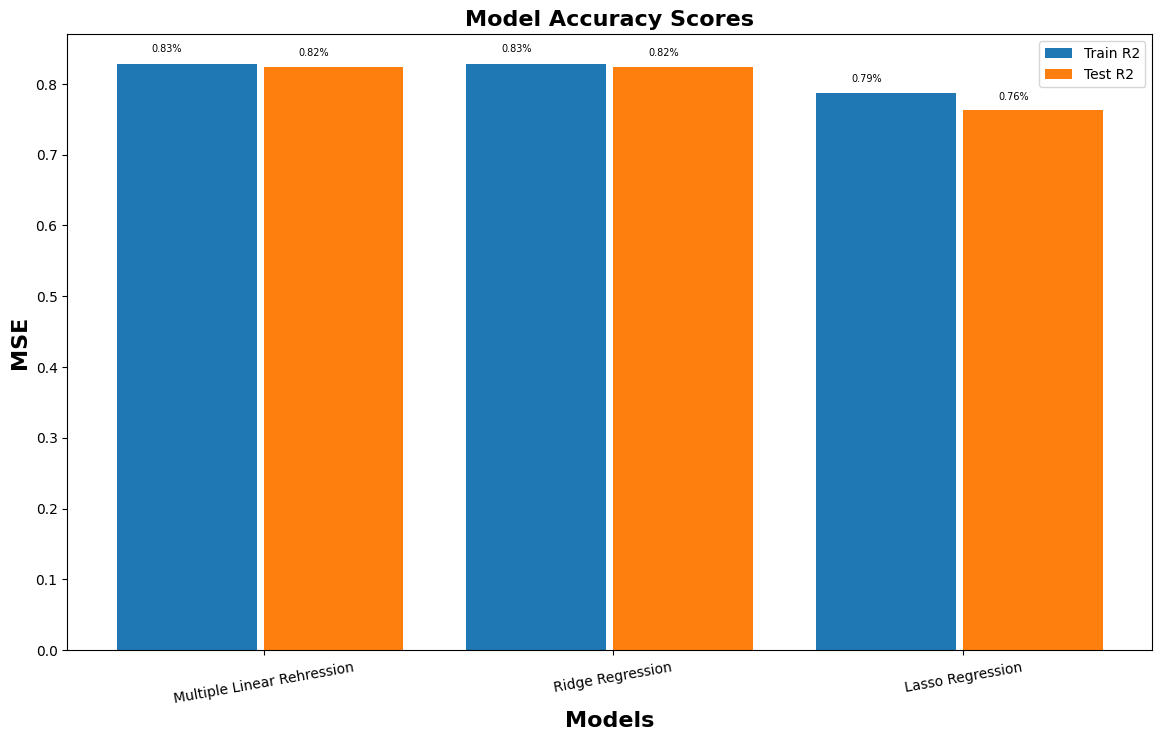

In [84]:
model_names = results_df['Model'].tolist()
models_train_r2 = results_df['Train R2'].tolist()
models_test_r2 = results_df['Test R2'].tolist()

fig, ax = plt.subplots(figsize=(14, 8))

x_pos = np.arange(3)

bar1 = plt.bar(x_pos - 0.22, models_train_r2 , width=0.4, label= 'Train R2')
bar2 = plt.bar(x_pos + 0.2, models_test_r2 , width=0.4, label= 'Test R2')
plt.xticks(x_pos, model_names)

plt.xlabel('Models', fontsize = 16, fontweight = 'bold')
plt.ylabel('MSE', fontsize = 16, fontweight = 'bold')
plt.title('Model Accuracy Scores', fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()


for i, bar in enumerate(bar1):
  plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() * 1.02,
           s = '{:.2f}%'.format(models_train_r2[i]), fontsize = 7)


for i, bar in enumerate(bar2):
  plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() * 1.02,
           s = '{:.2f}%'.format(models_test_r2[i]), fontsize = 7)
plt.show()


#  Hypothesis Testing: Effect of Day of the Week on Tip Amount

We want to test whether the **day of the week** (e.g., Thursday, Friday, Saturday, Sunday) has a significant effect on the **tip amount**.

### Hypotheses

- **Null Hypothesis (H₀):** The average tip amount is the same across all days.
- **Alternative Hypothesis (H₁):** At least one day has a different average tip amount.

We will use **one-way ANOVA** for this comparison.


In [87]:
import scipy.stats as stats

# Create groups of Days and tips
days = data['day'].unique()
tip_groups = [tips_data[data['day'] == d]['tip'] for d in days]

# PErform ANOVA
f_stat, p_val = stats.f_oneway(*tip_groups)

print("F-Statistic:", f_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("❗ Reject the null hypothesis: Tip amount depends on the day of the week.")
else:
    print("✔️ Fail to reject the null hypothesis: No significant difference in tip amounts across days.")


F-Statistic: 1.6723551980998699
p-value: 0.1735885553040592
✔️ Fail to reject the null hypothesis: No significant difference in tip amounts across days.
